In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
def idx_to_time(arr, samp_rate):
    print(len(arr))
    return np.arange(len(arr))/samp_rate 

In [3]:
def matched_filter(ref_filename, sig_filename, pulse_t, samp_rate, start_time, stop_time, flip = False):
    
    start_samp = int(start_time*samp_rate)
    stop_samp = int(stop_time*samp_rate)
    num_samp = stop_samp - start_samp
    
    t = np.linspace(0, num_samp/samp_rate, num = int(num_samp))
    t_corr = np.linspace(-num_samp/samp_rate, num_samp/samp_rate, num = int(2*num_samp-1))
    
    #Extracting and truncating signal data
    ref = np.fromfile(open(ref_filename), dtype="complex64")[start_samp:stop_samp]
    sig = np.fromfile(open(sig_filename), dtype="complex64")[start_samp:stop_samp]
    
    #Correlating and flipping the signal (or not)
    if flip == False:
        corr = scipy.signal.correlate(sig, ref)
    if flip == True:
        corr = scipy.signal.correlate(-sig, ref)
    
    #Self-correlating the reference signal
    self_corr = scipy.signal.correlate(ref, ref)
    
    #Raw truncated signal plot
    f1, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
    
    ax[0].plot(t, ref)
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Amplitude")
    ax[0].set_title("Reference Chirp")
    ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[0].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    ax[1].plot(t, sig)
    ax[1].set_xlabel("Time (s)")
    ax[1].set_title('Delayed Signal Chirp')
    ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    f1.subplots_adjust(wspace = 0)
    
    plt.show()
    
    #Self correlation and signal correlation plot
    f2, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
    
    ax[0].plot(t_corr, self_corr)
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Amplitude")
    ax[0].set_title("Reference self-correlation")
    ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[0].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    ax[1].plot(t_corr, corr)
    ax[1].set_xlabel("Time (s)")
    ax[1].set_title("Reference and signal correlation")
    ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    f2.subplots_adjust(wspace = 0)
    
    plt.show()
    
    #Superimposed self/signal correlation with zoom plot
    f3, ax = plt.subplots(1, 2, figsize = (12, 4), sharey = True)
    
    ax[0].plot(t_corr, self_corr, label = 'Reference')
    ax[0].plot(t_corr, corr, label = 'Rignal')
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Ampltidue")
    ax[0].set_title("Self-correlation and signal correlation")
    ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[0].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    ax[0].legend()

    ax[1].plot(t_corr[int(num_samp-50):int(num_samp+50)], self_corr[int(num_samp-50):int(num_samp+50)], 
                 label = 'Reference')
    ax[1].plot(t_corr[int(num_samp-50):int(num_samp+50)], corr[int(num_samp-50):int(num_samp+50)], 
                label = 'Signal')
    ax[1].set_xlabel("Time (s)")
    ax[1].set_title("Up-close signal and self- correlation")
    ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax[1].grid(color='gray', linestyle='-', linewidth=0.5, alpha = 0.5)
    
    ax[1].legend()
    
    f3.subplots_adjust(wspace = 0)
    
    plt.show()

/home/mhetu/miniconda3/envs/env0/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


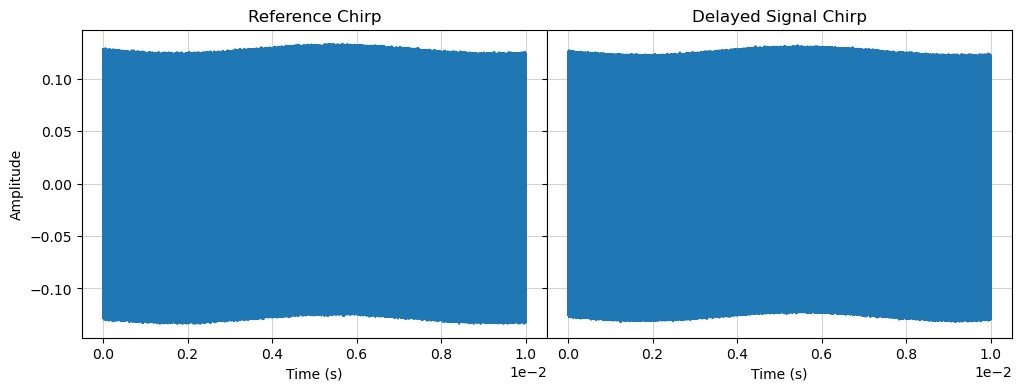

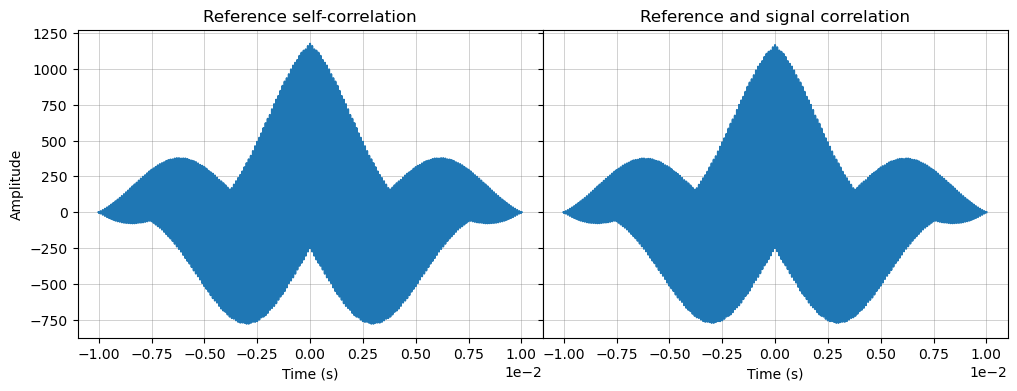

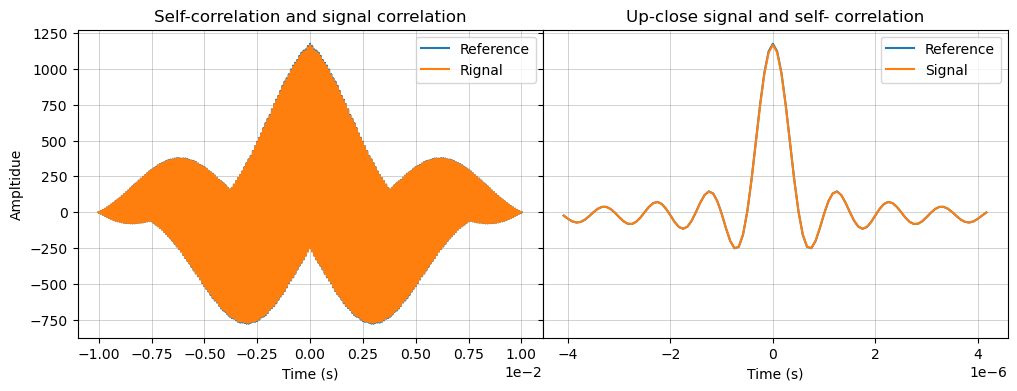

In [4]:
matched_filter("/home/mhetu/Desktop/gpr/gnu_log/out0_log02", "/home/mhetu/Desktop/gpr/gnu_log/out1_log02", 
               1/10000, 12e6, 0.1, 0.1+(100*1e-4), flip = False)

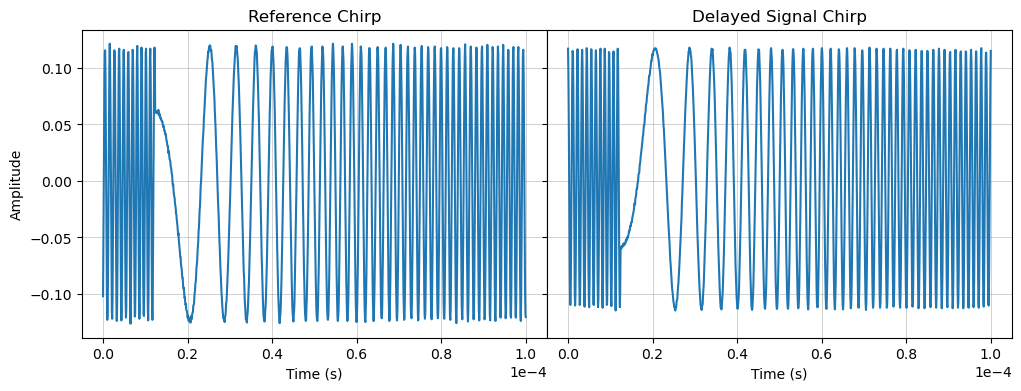

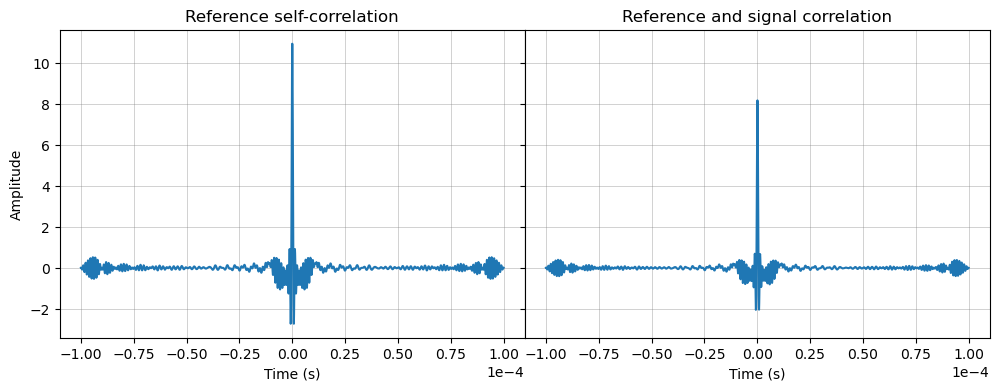

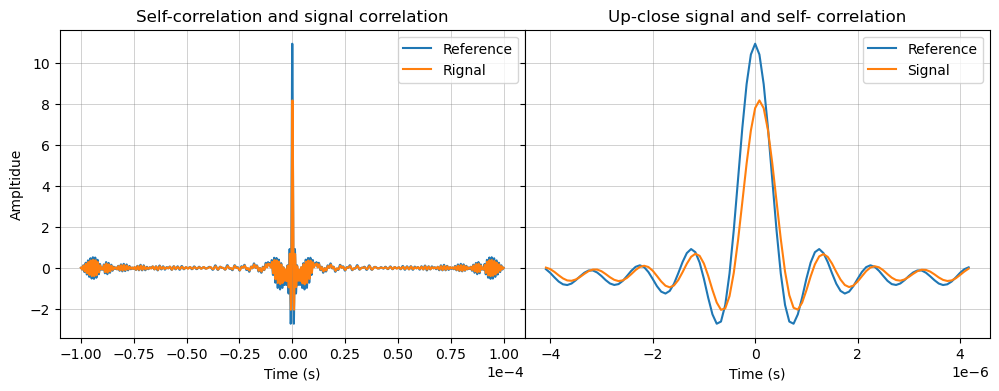

In [5]:
matched_filter("/home/mhetu/Desktop/gpr/gnu_log/out0_log01", "/home/mhetu/Desktop/gpr/gnu_log/out1_log01", 
               1/10000, 12e6, 0.1, 0.1+1e-4, flip = True)

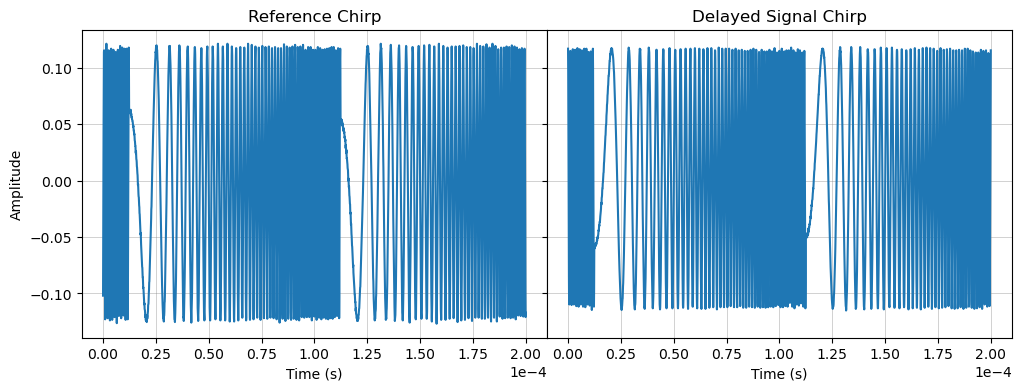

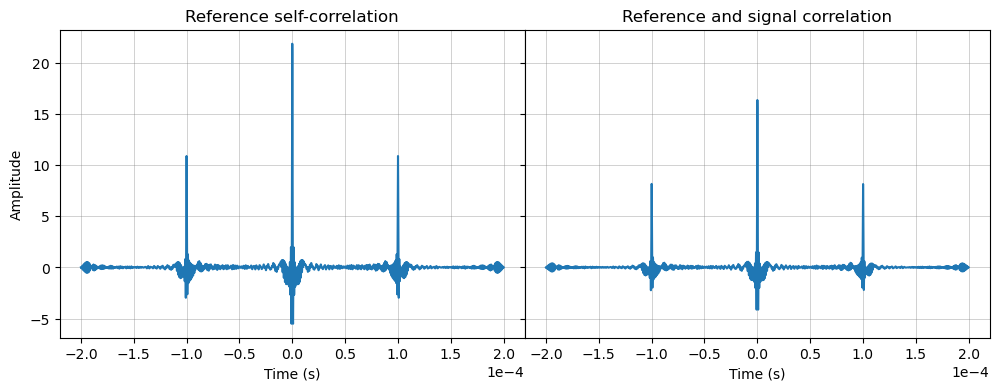

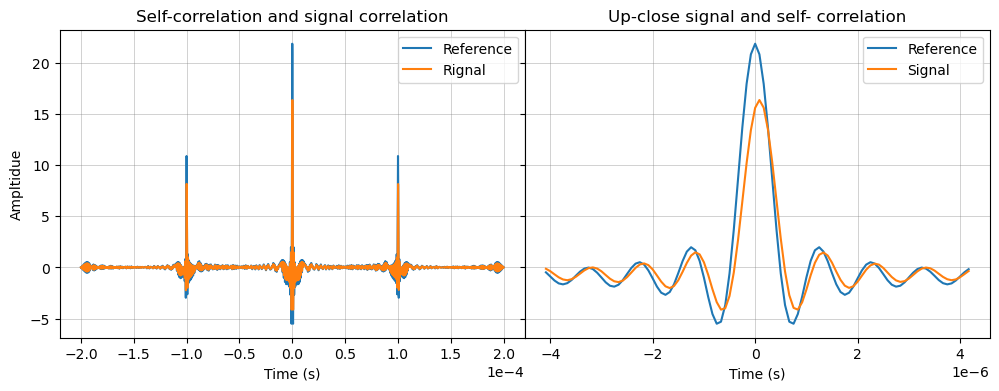

In [6]:
matched_filter("/home/mhetu/Desktop/gpr/gnu_log/out0_log01", "/home/mhetu/Desktop/gpr/gnu_log/out1_log01", 
               1/10000, 12e6, 0.1, 0.1+(1e-4*2), flip = True)

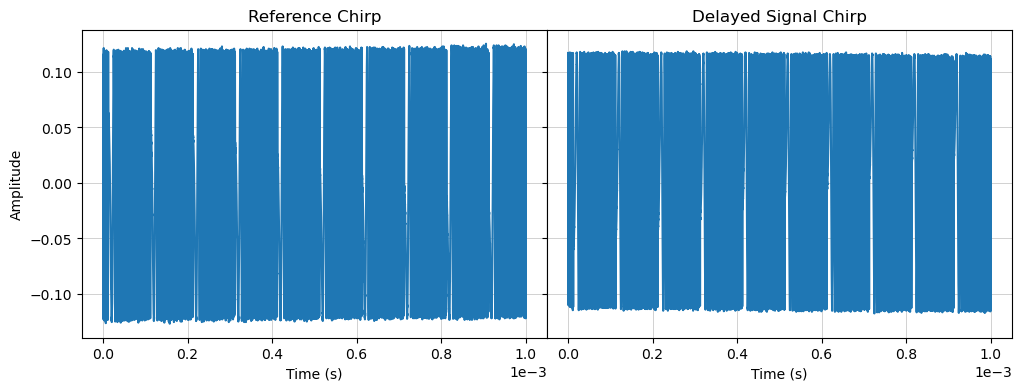

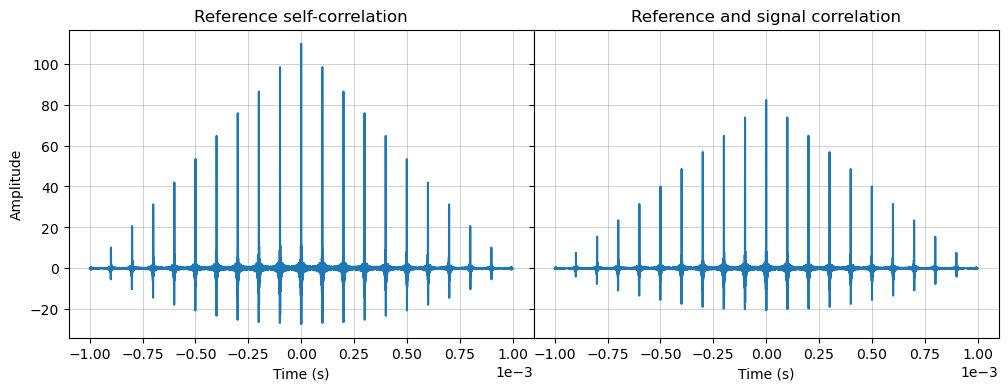

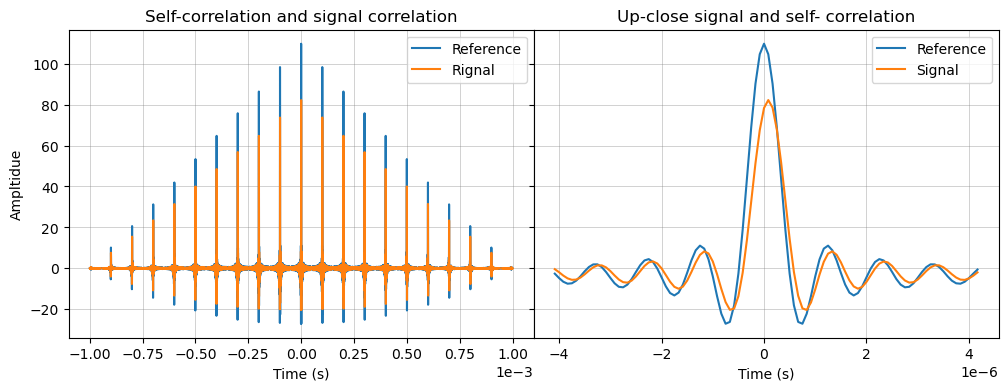

In [7]:
matched_filter("/home/mhetu/Desktop/gpr/gnu_log/out0_log01", "/home/mhetu/Desktop/gpr/gnu_log/out1_log01", 
               1/10000, 12e6, 0.1, 0.1+(1e-4*10), flip = True)

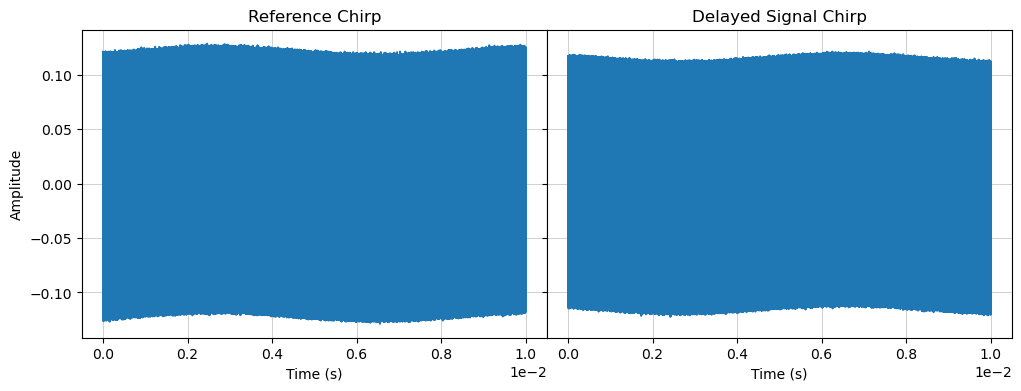

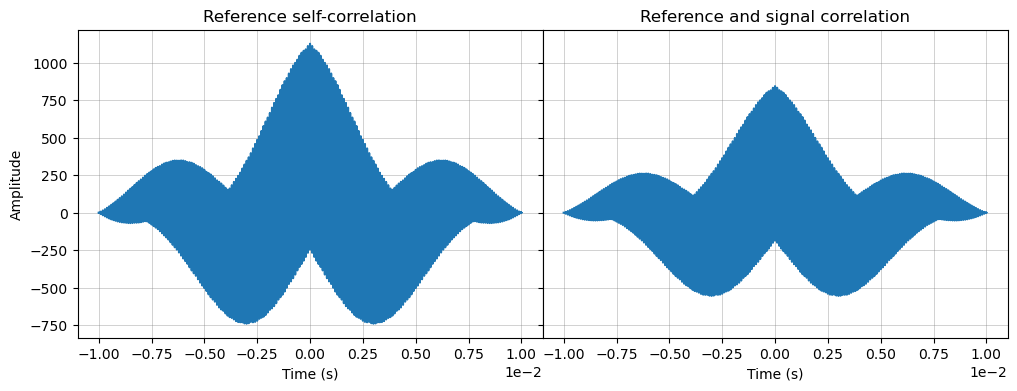

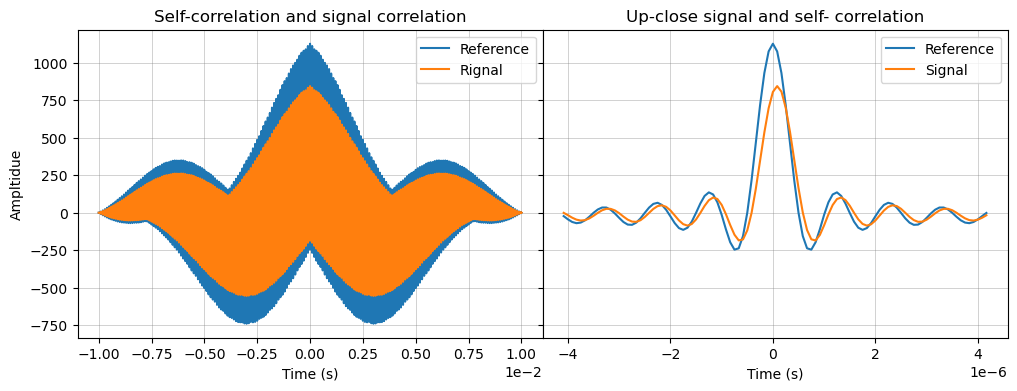

In [8]:
matched_filter("/home/mhetu/Desktop/gpr/gnu_log/out0_log01", "/home/mhetu/Desktop/gpr/gnu_log/out1_log01", 
               1/10000, 12e6, 0.1, 0.1+(1e-4*100), flip = True)

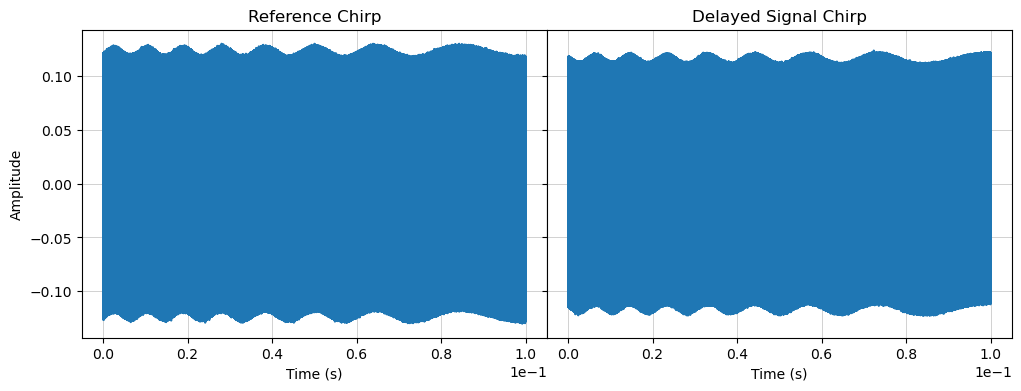

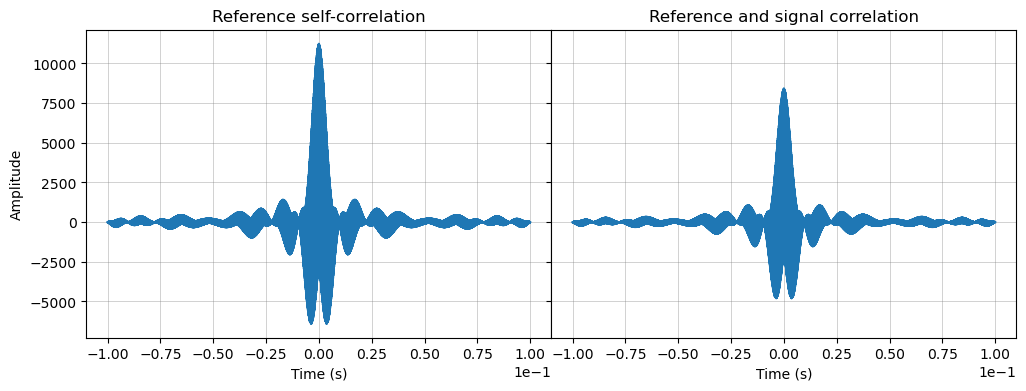

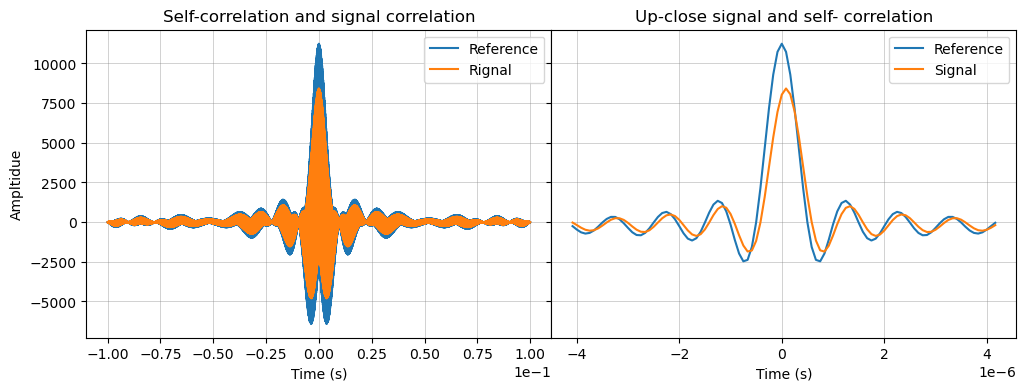

In [9]:
matched_filter("/home/mhetu/Desktop/gpr/gnu_log/out0_log01", "/home/mhetu/Desktop/gpr/gnu_log/out1_log01", 
               1/10000, 12e6, 0.1, 0.1+(1e-4*1000), flip = True)

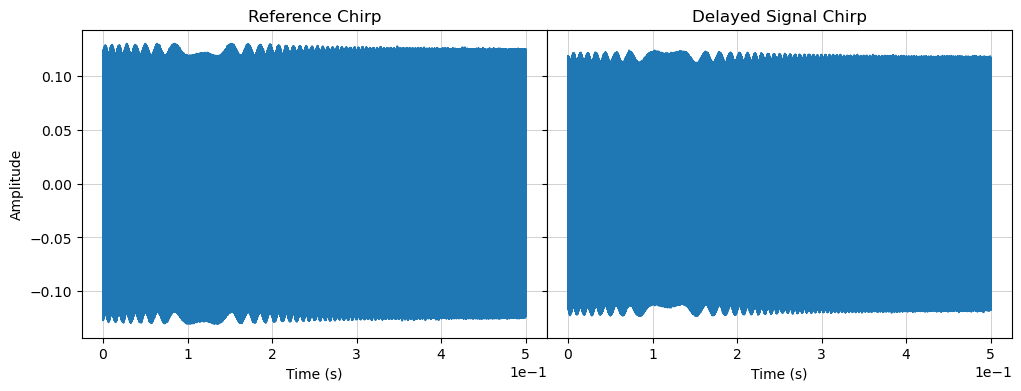

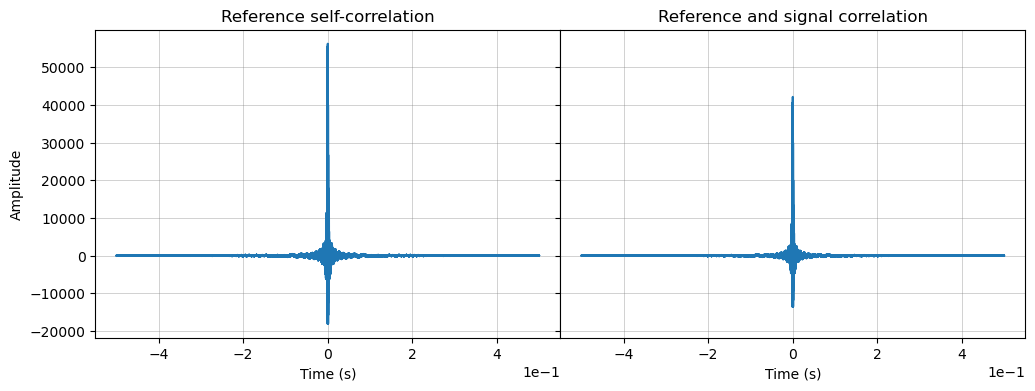

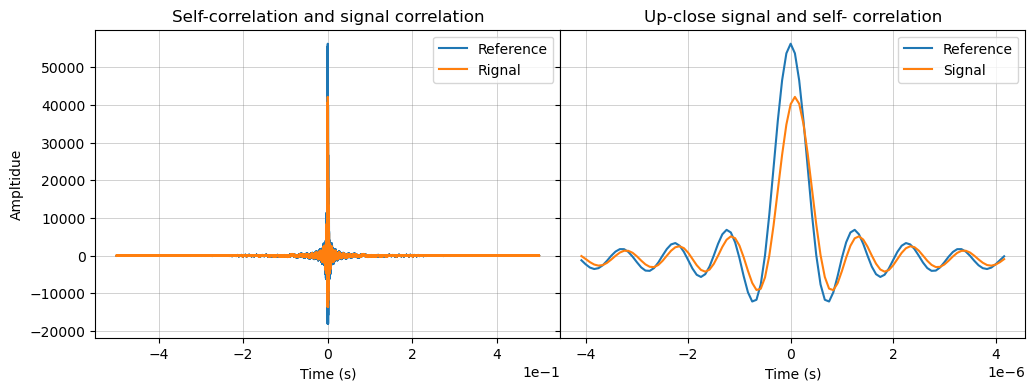

In [10]:
matched_filter("/home/mhetu/Desktop/gpr/gnu_log/out0_log01", "/home/mhetu/Desktop/gpr/gnu_log/out1_log01", 
               1/10000, 12e6, 0.1, 0.1+(1e-4*5000), flip = True)

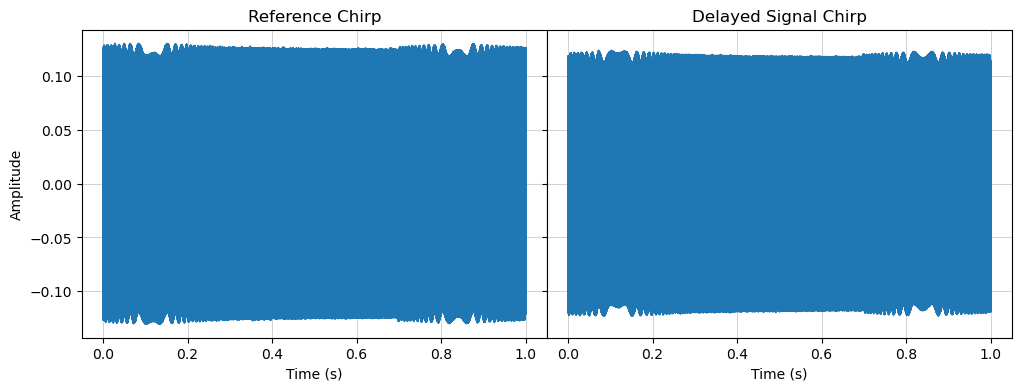

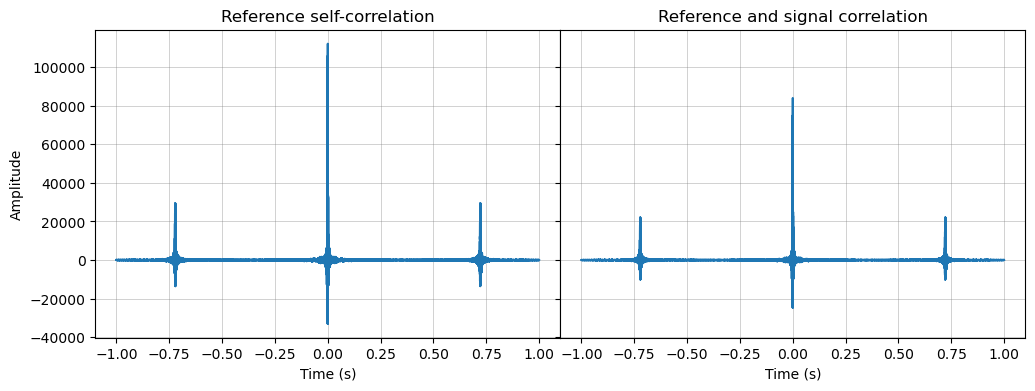

In [ ]:
matched_filter("/home/mhetu/Desktop/gpr/gnu_log/out0_log01", "/home/mhetu/Desktop/gpr/gnu_log/out1_log01", 
               1/10000, 12e6, 0.1, 0.1+(1e-4*10000), flip = True)

In [ ]:
matched_filter("/home/mhetu/Desktop/gpr/gnu_log/out0_log02", "/home/mhetu/Desktop/gpr/gnu_log/out1_log02", 
               1/10000, 12e6, 0.1, 0.1+1e-4, flip = True)

In [ ]:
sig1 = np.fromfile(open("/home/mhetu/Desktop/gpr/gnu_log/out0_log01"), dtype="complex64")[11000000:12000000]# Create a subplot for each file
sig2 = np.fromfile(open("/home/mhetu/Desktop/gpr/gnu_log/out1_log01"), dtype="complex64")[11000000:12000000]# Create a subplot for each file

In [ ]:
corr = scipy.signal.correlate(sig1, -sig2)
self_corr = scipy.signal.correlate(sig2, sig2)

In [ ]:
plt.plot((np.arange(len(corr))-len(sig1)), corr)
#plt.plot(np.arange(len(corr))-len(sig1), self_corr)

In [ ]:
sig1 = np.fromfile(open("/home/mhetu/Desktop/gpr/gnu_log/out0_log01"), dtype="complex64")[11000000:11002400]# Create a subplot for each file
sig2 = np.fromfile(open("/home/mhetu/Desktop/gpr/gnu_log/out1_log01"), dtype="complex64")[11000000:11002400]# Create a subplot for each file

In [ ]:
plt.plot(np.arange(len(sig1)), sig1)
plt.show()
plt.plot(np.arange(len(sig2)), sig2)
plt.show()

In [ ]:
corr = scipy.signal.correlate(sig1, -sig2)
self_corr = scipy.signal.correlate(sig2, sig2)

In [ ]:
plt.plot(np.arange(len(corr))-len(sig1), corr)
plt.plot(np.arange(len(corr))-len(sig1), self_corr)
plt.xlim(-2400, 2400)

In [ ]:
plt.plot(np.arange(len(corr[2350:2450])), corr[2350:2450])
plt.plot(np.arange(len(corr[2350:2450])), self_corr[2350:2450])

In [ ]:
peaks1 = scipy.signal.find_peaks(corr[2350:2450])
print(peaks1)
peaks2 = scipy.signal.find_peaks(self_corr[2350:2450])
print(peaks2)

In [ ]:
sig1 = np.fromfile(open("/home/mhetu/Desktop/gpr/gnu_log/out0_log02"), dtype="complex64")[11000000:11002400]# Create a subplot for each file
sig2 = np.fromfile(open("/home/mhetu/Desktop/gpr/gnu_log/out1_log02"), dtype="complex64")[11000000:11002400]# Create a subplot for each file

In [ ]:
plt.plot(np.arange(len(sig1)), sig1)
plt.show()
plt.plot(np.arange(len(sig2)), sig2)
plt.show()

In [ ]:
corr = scipy.signal.correlate(sig1, sig2)
self_corr = scipy.signal.correlate(sig1, sig1)

In [ ]:
plt.plot(np.arange(len(corr))-len(sig1), corr)
plt.plot(np.arange(len(corr))-len(sig1), self_corr)
plt.xlim(-2400, 2400)

In [ ]:
plt.plot(np.arange(len(corr[2350:2450]))-50, self_corr[2350:2450])
plt.plot(np.arange(len(corr[2350:2450]))-50, corr[2350:2450])
plt.plot(np.full(100, 0), np.linspace(-2.5, 17.5, num = 100))